## Brief Introduction about SVM

* A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.

* So you’re working on a text classification problem. You’re refining your training data, and maybe you’ve even tried stuff out using Naive Bayes. But now you’re feeling confident in your dataset, and want to take it one step further. Enter Support Vector Machines (SVM): a fast and dependable classification algorithm that performs very well with a limited amount of data to analyze.

**Working of SVM**

The basics of Support Vector Machines and how it works are best understood with a simple example. Let’s imagine we have two tags: red and blue, and our data has two features: x and y. We want a classifier that, given a pair of (x,y) coordinates, outputs if it’s either red or blue. We plot our already labeled training data on a plane:

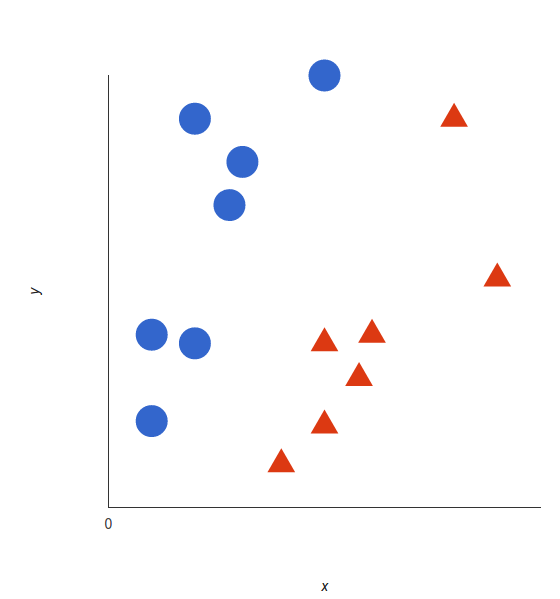

* A support vector machine takes these data points and outputs the hyperplane (which in two dimensions it’s simply a line) that best separates the tags. This line is the decision boundary: anything that falls to one side of it we will classify as blue, and anything that falls to the other as red.

* But, what exactly is the best hyperplane? For SVM, it’s the one that maximizes the margins from both tags. In other words: the hyperplane (remember it's a line in this case) whose distance to the nearest element of each tag is the largest.

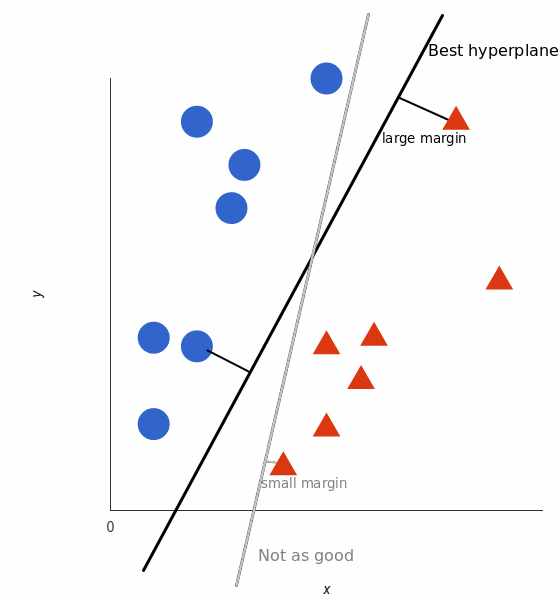

## Mathematics behind SVM Algorithm



**Point in Space Concept**
* Assuming that we are already familiar with the concept of the domain, range, and co-domain while defining a function in real space.

* When we define x in a real space, we understand its domain, and on mapping a function for y = f(x), we get range and co-domain.

* So, initially, we are given the data which is to be separated by the algorithm.The data given for separating/classifying is represented as a unique point in a space where each point is represented by some feature vector x.
$x ∊ R^D$

**Decision Boundary**

Decision Boundary is the main separator for dividing the points into their respective classes.

Equation of Hyperplane:
The equation of the main separator line is called a hyperplane equation.

 
 

Mathematics SVM line
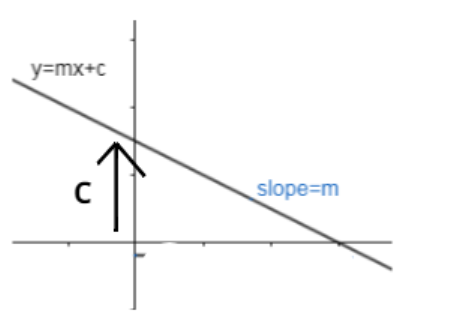
 

Let us look at the equation for a straight line with slope m and intercept c.

The equation becomes : mx + c = 0

 

 

The hyperplane equation dividing the points (for classifying) can now easily be written as:

$H: w^T(x) + b = 0$

**Distance Measure**
Now that we have seen, how to represent data points, and how to fit a separating line between the points. But, while fitting the separating line, we would obviously want such a line that would be able to segregate the data points in the best possible way having the least mistakes/errors of miss-classification.

So, to have the least errors in the classification of the data points, that concept will require us to first know the distance between a data point and the separating line.
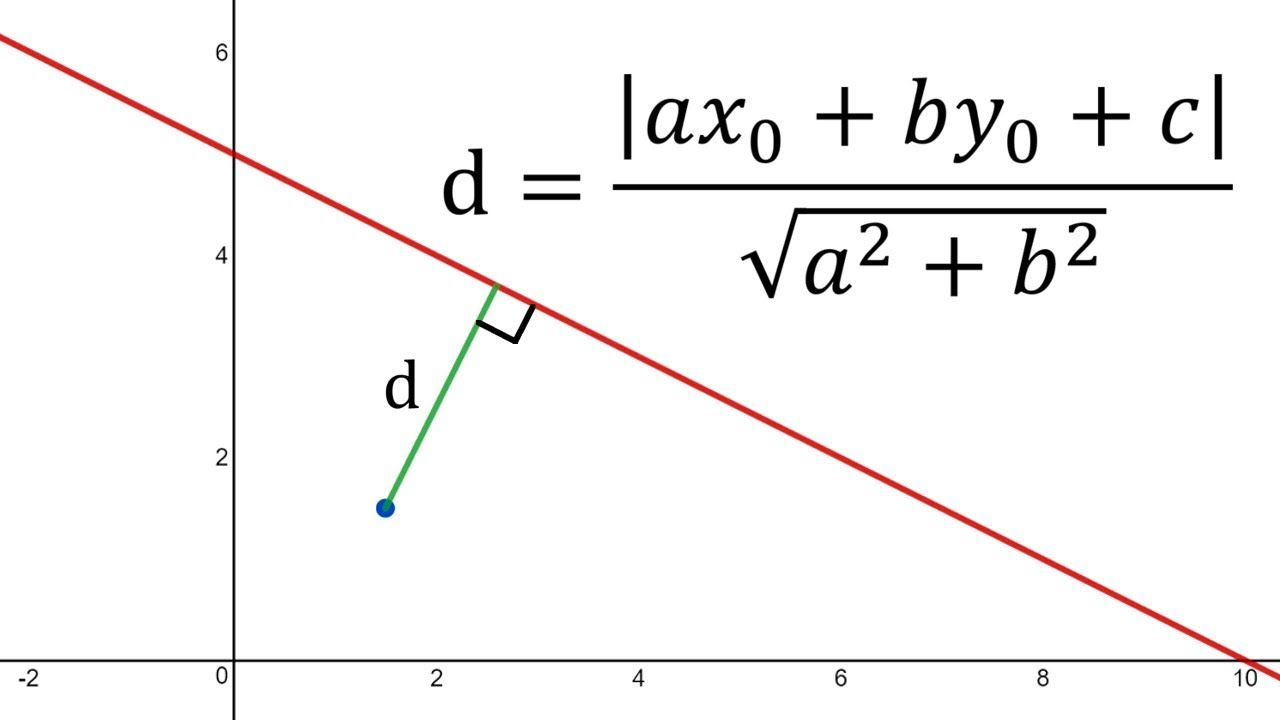
The distance of any line, ax + by + c = 0 from a given point say, (x0 , y0) is given by d.

Similarly, the distance of a hyperplane equation: wTΦ(x) + b = 0 from a given point vector Φ(x0) can be easily written as :
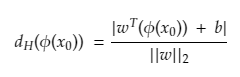

here ||w||2 is the Euclidean norm for the length of w given by :

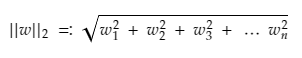


**Basic Linear Algebra**

* Vectors

Vectors are mathematical quantity which has both magnitude and direction. A point in the 2D plane can be represented as a vector between origin and the point.
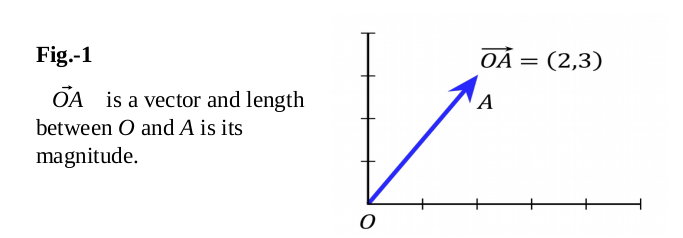

* Length of Vectors

Length of vectors are also called as norms. It tells how far vectors are from the origin.
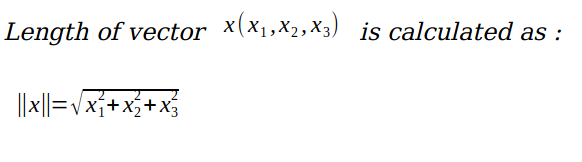

* Direction of Vectors
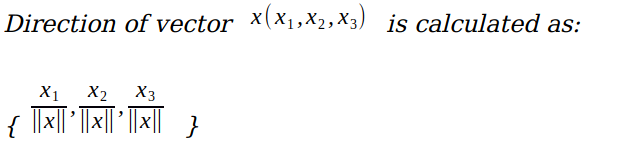

* Dot Product

Dot product between two vectors is a scalar quantity . It tells how to vectors are related.
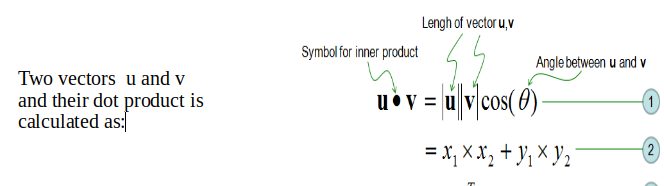


**Implementation of SVM using an Example**

**Linear SVM Example**
These are commonly recommended for text classification because most of these types of classification problems are linearly separable.

The linear kernel works really well when there are a lot of features, and text classification problems have a lot of features. Linear kernel functions are faster than most of the others and you have fewer parameters to optimize.

Here's the function that defines the linear kernel:

f(X) = w^T * X + b
In this equation, w is the weight vector that you want to minimize, X is the data that you're trying to classify, and b is the linear coefficient estimated from the training data. This equation defines the decision boundary that the SVM returns.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [2]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

The reason we're working with numpy arrays is to make the matrix operations faster because they use less memory than Python lists. You could also take advantage of typing the contents of the arrays. Now let's take a look at what the data look like in a plot:

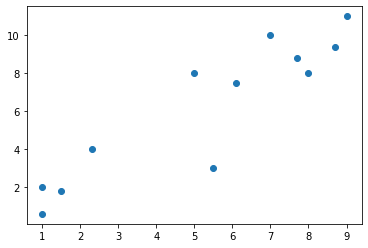

In [3]:
# show unclassified data
plt.scatter(X, y)
plt.show()

We'll do a bit of pre-processing on the already structured code. This will put the raw data into a format that we can use to train the SVM model.

In [4]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

Now we can create the SVM model using a linear kernel.

In [5]:
# define the model
clf = svm.SVC(kernel='linear', C=1.0)

That one line of code just created an entire machine learning model. Now we just have to train it with the data we pre-processed.

In [6]:
# train the model
clf.fit(training_X, training_y)

SVC(kernel='linear')

That's how you can build a model for any machine learning project. The dataset we have might be small, but if you encounter a real-world dataset that can be classified with a linear boundary this model still works.
With your model trained, you can make predictions on how a new data point will be classified and you can make a plot of the decision boundary. Let's plot the decision boundary.

No handles with labels found to put in legend.


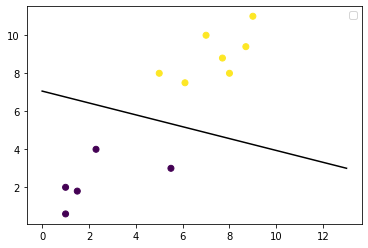

In [7]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()

**Non-Linear SVM Example**

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

This set of imports is similar to those in the linear example, except it imports one more thing. Now we can use a dataset directly from the Scikit-learn library.

In [9]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

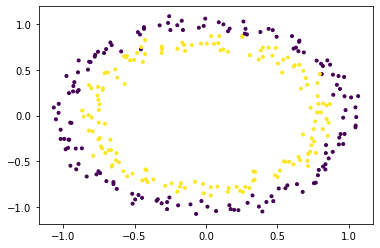

In [10]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

Now that you can see how the data are separated, we can choose a non-linear SVM to start with. This dataset doesn't need any pre-processing before we use it to train the model, so we can skip that step. Here's how the SVM model will look for this:

In [11]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In this case, we'll go with an RBF (Gaussian Radial Basis Function) kernel to classify this data. You could also try the polynomial kernel to see the difference between the results you get. Now it's time to train the model.

In [12]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC()

You can start labeling new data in the correct category based on this model. To see what the decision boundary looks like, we'll have to make a custom function to plot it.

In [13]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

You have everything you need to plot the decision boundary for this non-linear data. We can do that with a few lines of code that use the Matlibplot library, just like the other plots.

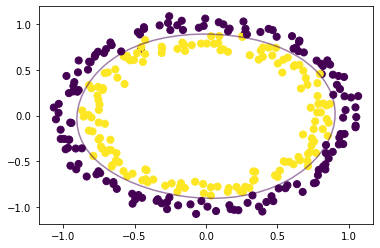

In [14]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

## Support Vectors Classifier for Breast Cancer Detection (Implementation Example)

In [15]:
from sklearn import datasets
 
cancer_data = datasets.load_breast_cancer()
print(cancer_data.data[5])

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]


In [16]:
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

**Splitting Data**

We will divide the data-set into a training set and test set to get accurate results. After this, we will split the data using the train_test_split() function. We will need 3 parameters like in the example below. The features to train the model, the target, and the test set size.

In [17]:
from sklearn.model_selection import train_test_split
 
cancer_data = datasets.load_breast_cancer()
 
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.4,random_state=42)


**Generating the Model**

In [18]:
from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)

In [19]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred))
print(metrics.classification_report(y_test, y_pred=pred))

acuracy: 0.9605263157894737
precision: 0.9664429530201343
recall 0.972972972972973
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        80
           1       0.97      0.97      0.97       148

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



We are getting the accuracy, precision and recall values as 0.96, 0.96 and 0.97 which is highly unlikely. Since our data-set was quite descriptive and decisive we were able to get such accurate results. Normally, anything above a 0.7 accuracy score is a good score.

## Applications of SVM

As we have seen, SVMs depends on supervised learning algorithms. The aim of using SVM is to correctly classify unseen data. SVMs have a number of applications in several fields.
Some common applications of SVM are-

* Face detection – SVMc classify parts of the image as a face and non-face and create a square boundary around the face.
* Text and hypertext categorization – SVMs allow Text and hypertext categorization for both inductive and transductive models. They use training data to classify documents into different categories. It categorizes on the basis of the score generated and then compares with the threshold value.
* Classification of images – Use of SVMs provides better search accuracy for image classification. It provides better accuracy in comparison to the traditional query-based searching techniques.
* Bioinformatics – It includes protein classification and cancer classification. We use SVM for identifying the classification of genes, patients on the basis of genes and other biological problems.
* Protein fold and remote homology detection – Apply SVM algorithms for protein remote homology detection.
* Handwriting recognition – We use SVMs to recognize handwritten characters used widely.
* Generalized predictive control(GPC) – Use SVM based GPC to control chaotic dynamics with useful parameters.